**Samuel Munoz**

Spring 2021

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:

- `np.linalg.eig`

**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Principal component analysis using the covariance matrix

In this task, you will implement principal component analysis (PCA) using the covariance matrix method, test your code, plot the results on the Iris dataset, then run PCA and analyze on several other datasets

### 1a) Import Iris data

- In the below cell, load in the Iris dataset into a pandas DataFrame (note, this version of iris does not have the data type row — going forward, csv files we work with won't have this `type` row).
- Print out the head (only showing the first 5 data samples).
- Create an `PCA_COV` object called `pca` based on the DataFrame object that you just created.

In [2]:
# load iris data
iris_data = pd.read_csv("data/iris.csv", delimiter=",")

# print data
print(iris_data.head())

# create PCA_COV object
pca = pca_cov.PCA_COV(iris_data)

   sepalLength  sepalWidth  petalLength  petalWidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


Your code should print something that looks like this (with fancier formatting):

    sepalLength	sepalWidth	petalLength	petalWidth	species
    0	5.1	3.5	1.4	0.2	0
    1	4.9	3.0	1.4	0.2	0
    2	4.7	3.2	1.3	0.2	0
    3	4.6	3.1	1.5	0.2	0
    4	5.0	3.6	1.4	0.2	0


### 1b) Implement PCA

Implement and test the following methods necessary to perform PCA in `pca_cov.py`.

- `covariance_matrix`: Computes the covariance matrix of data
- `compute_prop_var`: Computes the proportion variance accounted for by the principal components (PCs).
- `compute_cum_var`: Computes the *cumulative* proportion variance accounted for by the PCs.
- `pca`: Method to perform PCA on the data
- `elbow_plot` (**answer Question 1**)
- `pca_project`: Project the data into PCA space

#### (i) Test `covariance_matrix`

In [3]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Your covariance matrix is:\n{cov_mat} and should be\n[[ 1.06338 -0.07562  0.11267]\n [-0.07562  0.97412 -0.0222 ]\n [ 0.11267 -0.0222   0.96217]]')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]] and should be
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]]


#### (ii) Test `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [4]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)} and should be 10')
print(f'Your proportion variance list begins with\n{prop_var[:2]} and it should be\n[0.15649813681155653, 0.1448232917174111]')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with
[0.15649813681155653, 0.1448232917174111] and it should be
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [5]:
# Test accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
accum_var = pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)} and should be 10')
print(f'Your cumulative variance list begins with\n{accum_var[:2]} and should be\n[0.15649813681155653, 0.3013214285289676]')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676] and should be
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `pca`

Performs PCA using the covariance matrix method.

In [26]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# Test values|
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.924618723201727, 0.9776852063187949, 0.9947878161267245, 0.9999999999999999] .')


There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion variance account for:
[0.924618723201

In [7]:
# Test pca (normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers, normalize=True)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print(f'Data min/max is {pca.A.min()}/{pca.A.max()} should be 0.0/1.0')
print()

# Some test values
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[0.23245 0.03247 0.0096  0.00176].')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.
Data min/max is -0.46745762711864414/0.5712962962962962 should be 0.0/1.0

Your eigenvalues:
[0.23245 0.03247 0.0096  0.00176]. They should be
[0.23245 0.03247 0.0096  0.00176].
Cumulative proportion variance account for:
[0.8413603821315435, 0.9588784639918417, 0.9936140780797743, 1.0]. It should be
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].


#### (v) Test `elbow_plot`

Visualize the cumulative proportion variance accounted for by the first $k$ principal components.

**Make sure that you have the normalized PCA in memory before proceeding (the last cell of test code above)**

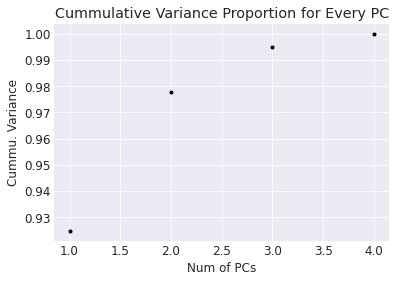

In [30]:
# change fonts globally
plt.rcParams['font.size'] = '12'

# test elbow plot
pca.elbow_plot()
plt.show()

**Question 1:** Based on the Iris elbow plot, how many principle components would you drop. Why?

**Question 1 answer:** I would drop PCs. I would this because I think a good threshold value of data to keep is 90%. Looking at the plot, keeping two PCs would leave me with 90%+ of the total variance. That satifies my threshold, so I drop the rest of my PCs. There are two left. Thus, those get dropped

#### (vi) Test `pca_project`

Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`)

In [9]:
num_dims = 2
pcs_to_keep = np.arange(num_dims)
iris_proj = pca.pca_project(pcs_to_keep)
print(iris_proj.shape)

(150, 2)


##### Plot your PCA projected Iris data

- In the cell below, create a scatterplot of your PCA projected data.
- Label the x and y axes appropriately.

If everything goes well, you should see two distinct clusters

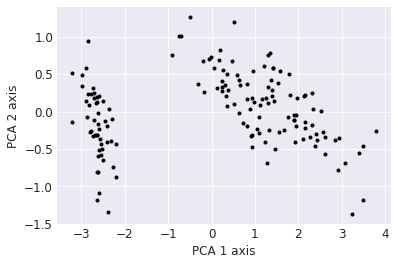

In [29]:
# change fonts globally
plt.rcParams['font.size'] = '12'

# ploting the first two columns on my PCA projected data 
plt.plot(pca.A_proj[:, 0], pca.A_proj[:, 1], "k.")
plt.xlabel("PCA 1 axis")
plt.ylabel("PCA 2 axis")
plt.show()

### 1c) Dropping different pairs of principal components

- In the cell below, create a "high quality" 2x2 subplots grid of scatterplots that drops different consective PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [2, 3]
- (top-right) PCs [1, 2]
- (bottom-left) PCs [3, 0]
- (bottom-right) PCs [0, 1]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legiable.

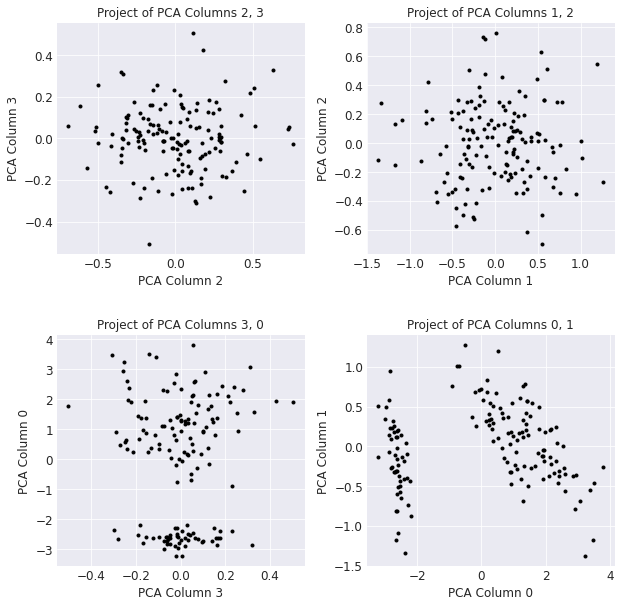

In [27]:
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# change fonts globally
plt.rcParams['font.size'] = '12'

# work on subplot 1
plt.subplot(221)
# project data
pca.pca_project([2, 3])
plt.plot(pca.A_proj[:, 0], pca.A_proj[:, 1], "k.")
plt.title("Project of PCA Columns 2, 3", fontsize=12)
plt.xlabel("PCA Column 2", fontsize=12)
plt.ylabel("PCA Column 3", fontsize=12)

# work on subplot 2
plt.subplot(222)
# project data
pca.pca_project([1, 2])
plt.plot(pca.A_proj[:, 0], pca.A_proj[:, 1], "k.")
plt.title("Project of PCA Columns 1, 2", fontsize=12)
plt.xlabel("PCA Column 1", fontsize=12)
plt.ylabel("PCA Column 2", fontsize=12)

# work on subplot 3
plt.subplot(223)
# project data
pca.pca_project([3, 0])
plt.plot(pca.A_proj[:, 0], pca.A_proj[:, 1], "k.")
plt.title("Project of PCA Columns 3, 0", fontsize=12)
plt.xlabel("PCA Column 3", fontsize=12)
plt.ylabel("PCA Column 0", fontsize=12)

# work on subplot 4
plt.subplot(224)
# project data
pca.pca_project([0, 1])
plt.plot(pca.A_proj[:, 0], pca.A_proj[:, 1], "k.")
plt.title("Project of PCA Columns 0, 1", fontsize=12)
plt.xlabel("PCA Column 0", fontsize=12)
plt.ylabel("PCA Column 1", fontsize=12)

# space plots
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.show()

**Question 2:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Question 2 answer:** What the 2x2 grid of plots tell me about the different PCs is that for certain pair of PCs vectors, the plot of those vectors reveals clusters appear in the data. This may be of use for some reason later on. Additionally, I can also see that not every pair of columns are useful since some pair do not make any useful clusters that I could use later 

### 1e) Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables `sepalLength` (x), `sepalWidth` (y) of the Iris data **without any normalization**.
- In the 2nd cell below, do PCA **on the normalized Iris data** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepalLength`, `sepalWidth` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
    - If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your 'sepalLength', 'sepalWidth' plot created one cell above — including the data range and center).

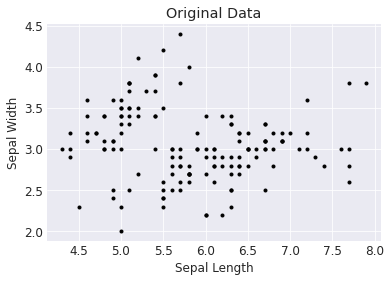

In [47]:
# Plot original iris data
# get data that I want
original_data = pca.data.to_numpy()

# change fonts globally
plt.rcParams['font.size'] = '12'

# plot data
plt.plot(original_data[:, 0], original_data[:, 1], "k.")
plt.title("Original Data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

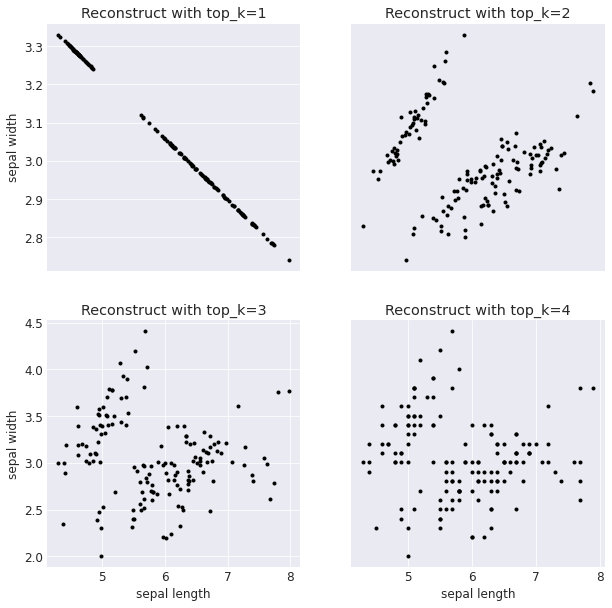

In [48]:
# perform pca on the data above with normalization
pca.pca(["sepalLength", "sepalWidth", "petalLength", "petalWidth"], normalize=True)

# 2x2 grid of scatter plots
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# work on subplot 1
plt.subplot(221)
# project data
data = pca.pca_then_project_back(1)
plt.plot(data[:, 0], data[:, 1], "k.")
plt.xticks([])
plt.title("Reconstruct with top_k=1")
plt.ylabel("sepal width")


# work on subplot 2
plt.subplot(222)
# project data
data = pca.pca_then_project_back(2)
plt.plot(data[:, 0], data[:, 1], "k.")
plt.xticks([])
plt.yticks([])
plt.title("Reconstruct with top_k=2")

# # work on subplot 3
plt.subplot(223)
# project data
data = pca.pca_then_project_back(3)
plt.plot(data[:, 0], data[:, 1], "k.")
plt.title("Reconstruct with top_k=3")
plt.ylabel("sepal width")
plt.xlabel("sepal length")

# # work on subplot 4
plt.subplot(224)
# project data
data = pca.pca_then_project_back(4)
plt.plot(data[:, 0], data[:, 1], "k.")
plt.yticks([])
plt.title("Reconstruct with top_k=4")
plt.xlabel("sepal length")
plt.show()

**Question 3:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Question 3 answer:** One the first re-projection, the data does a terrible job of maintaining any of the properties of the original data. At first glance, the data does not capture the positive slope seen in the original data. The second graph (k_top = 2) is a big improvement of the second graph and captures a nice chunk of the properties of the original data set. When k_top = 3, we see that the data clusters become more varied. This implies that the PCAs are capturing more subtle details about the data set. Finally, top_k = 4 is exactly the like the original data set. I would expect this no data was dropped.

## Task 2: Eigenfaces. Perform PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 2a) Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [32]:
face_imgs = np.load('data/lfwcrop.npy')
face_names = np.loadtxt('data/lfwcrop_ids.txt', dtype=str, delimiter='\n')

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 2b) Look at the face data

- In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow
- Run the function to create the plot of the faces below.
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

In [41]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
        # create subplots
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
    
    # loop through all face images and plot each one on a subplot
    for index in range(face_imgs.shape[0]):
        # reshape img_y and img_x into an image
        image = (face_imgs[index])
        
        # plot image
        plt.subplot(5, 5, index+1)
        plt.imshow(image, cmap=plt.get_cmap("gray"))
        
        # give title
        plt.title(face_names[index])
        
        # remove x- and yticks
        plt.xticks([])
        plt.yticks([])

### 2c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

NOTE: Use the same `cmap` parameter as above and turn off x and y tick marks.

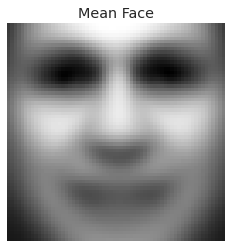

In [33]:
# get mean face
mean_face = np.mean(face_imgs, axis=0)

# change fonts globally
plt.rcParams['font.size'] = '12'

# plot mean face
plt.imshow(mean_face, cmap=plt.get_cmap("gray"))
plt.title("Mean Face")
plt.xticks([])
plt.yticks([])
plt.show()

**Question 4:** What does the "mean face" image represent?

**Question 4 answer:** The mean face represents the average grayscale value at each pixel. The image makes outlines the general face. Therefore, what the mean face captures is that the color of our eyes normally is distinguished the rest of our face. The same applies to our nose and mouth. 

### 4d) Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.


- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [34]:
# Your reshape code here
face_imgs_vec = np.reshape(face_imgs, (13231, 4096))

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 2e) Perform PCA on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_COV` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

NOTE: This is not a "toy" dataset so it might take a few minutes to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [35]:
# create Pandas DataFrame
face_data_df = pd.DataFrame(face_imgs_vec)

# create PCA_COV object to store dataframe
pca_obj = pca_cov.PCA_COV(face_data_df)

# test how long it takes for PCA to run
import time

# run pca
t0 = time.time()
pca_obj.pca(np.arange(0, 4096))
t1 = time.time()

# difference in time
t = t1 - t0

# print time elapsed
print(f"Time elapsed: {t:{4}.{6}} seconds")

Time elapsed: 159.712 seconds


### 2f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.
- You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.

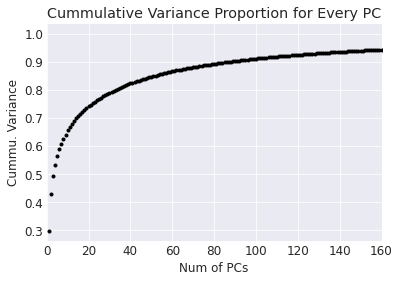

In [49]:
# run elbow plot
pca_obj.elbow_plot()

# change fonts globally
plt.rcParams['font.size'] = '12'

# set lower and upper bounds for the x-axis
x_lower = 0
x_upper = 160
plt.xlim(x_lower, x_upper)

# plot data
plt.show()

### 2g) Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%


- For each of the above number of PCs, project them back onto the original data space.
- Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
- Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

In [52]:
# takes old data used by PCA and reformats back into images
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    # determine size of img_y and img_x
    # it must be a square
    xy_size = reconstucted_imgs.shape[1]**(1/2)
    
    # if the the second number of the object is a perfect square, then store into xy_size and reshape data
    if xy_size == int(xy_size):
        xy_size = int(xy_size)
    # otherwise, throw an error
    else:
        print(f"Cannot reshape data. {reconstucted_imgs.shape[1]} is not a perfect square")
        return
    
    return np.reshape(reconstucted_imgs, (reconstucted_imgs.shape[0], 64, 64))

#### 50% variance face grid

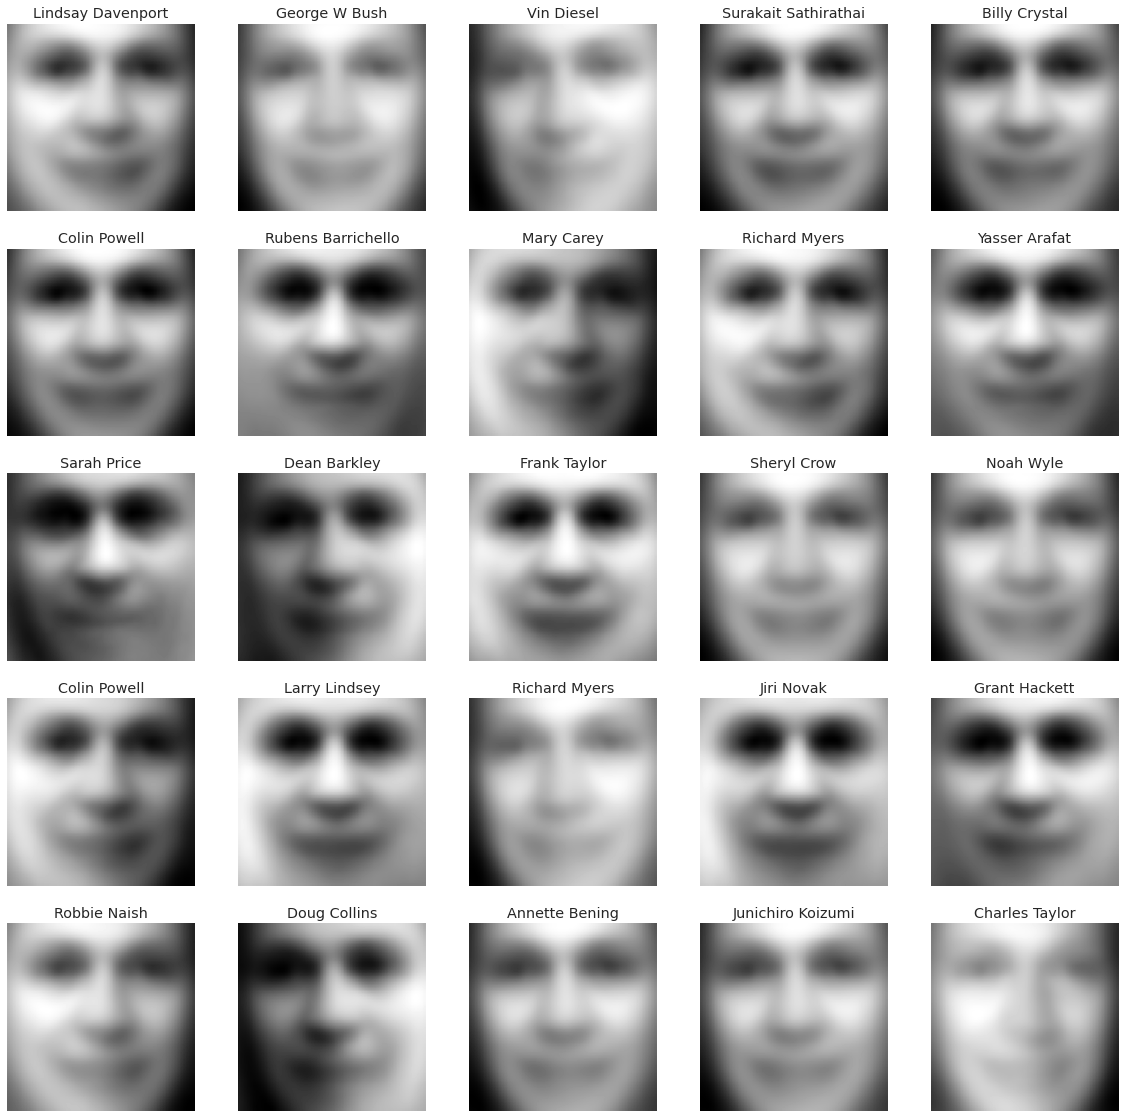

In [42]:
# project top 50% of PCA (PCA = 3)
reconst = pca_obj.pca_then_project_back(3)

# change fonts globally
plt.rcParams['font.size'] = '12'

# rebuild image
i = make_imgs(reconst)

# show random faces
l = np.random.randint(13231-25)

# show images
face_plot(i[:25], face_names[:25])

#### 70% variance face grid

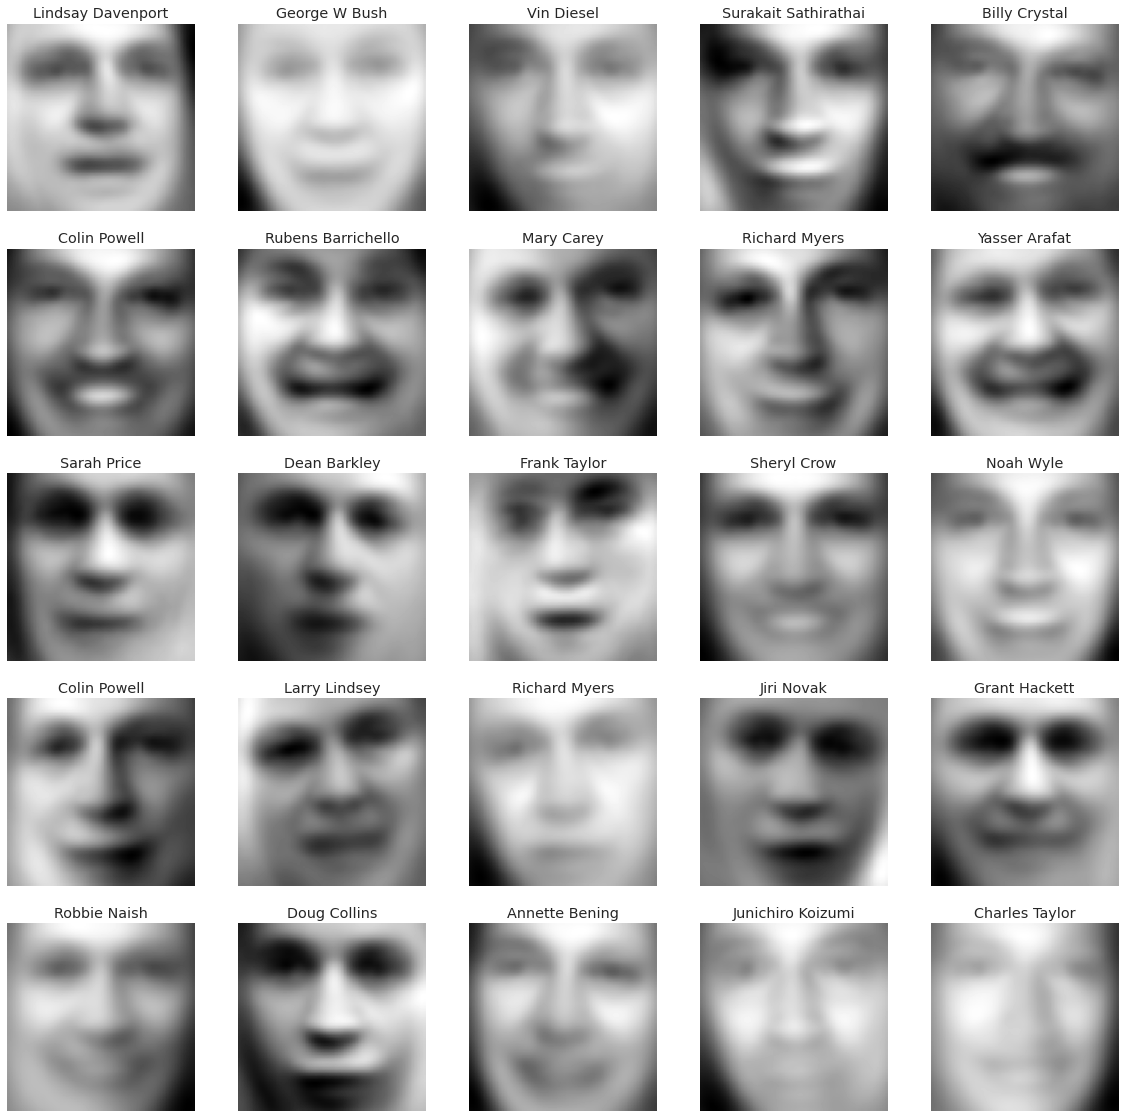

In [43]:
# project top 70% of PCA (PCA = 14)
reconst = pca_obj.pca_then_project_back(14)

# change fonts globally
plt.rcParams['font.size'] = '12'

# rebuild image
i = make_imgs(reconst)

# show random faces
# l = np.random.randint(13231-25)

# show images
face_plot(i[:25], face_names[:25])

#### 80% variance face grid

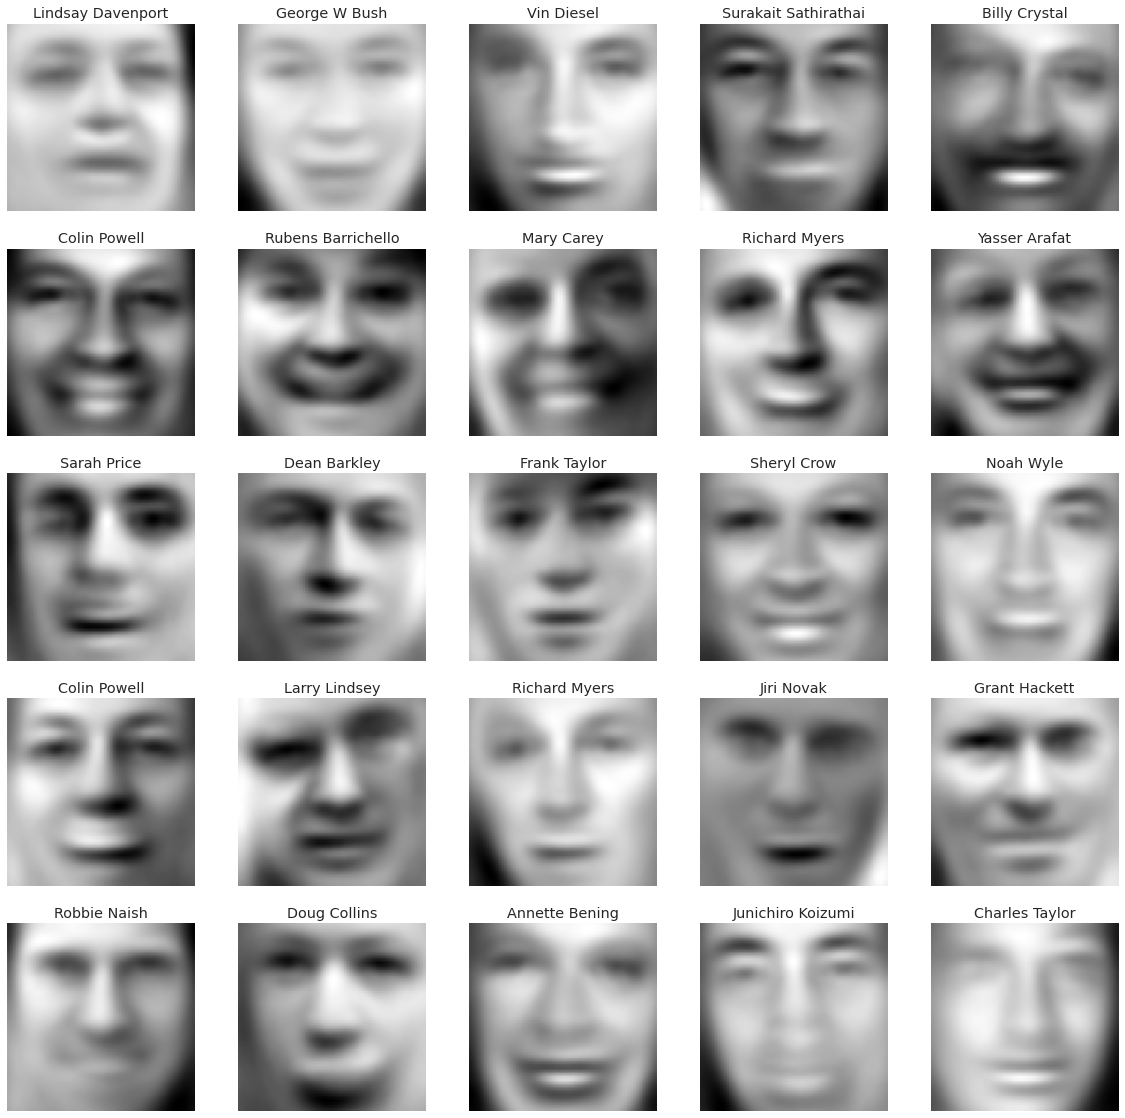

In [44]:
# project top 80% of PCA (PCA = 33)
reconst = pca_obj.pca_then_project_back(33)

# change fonts globally
plt.rcParams['font.size'] = '12'

# rebuild image
i = make_imgs(reconst)

# show random faces
# l = np.random.randint(13231-25)

# show images
face_plot(i[:25], face_names[:25])

#### 95% variance face grid

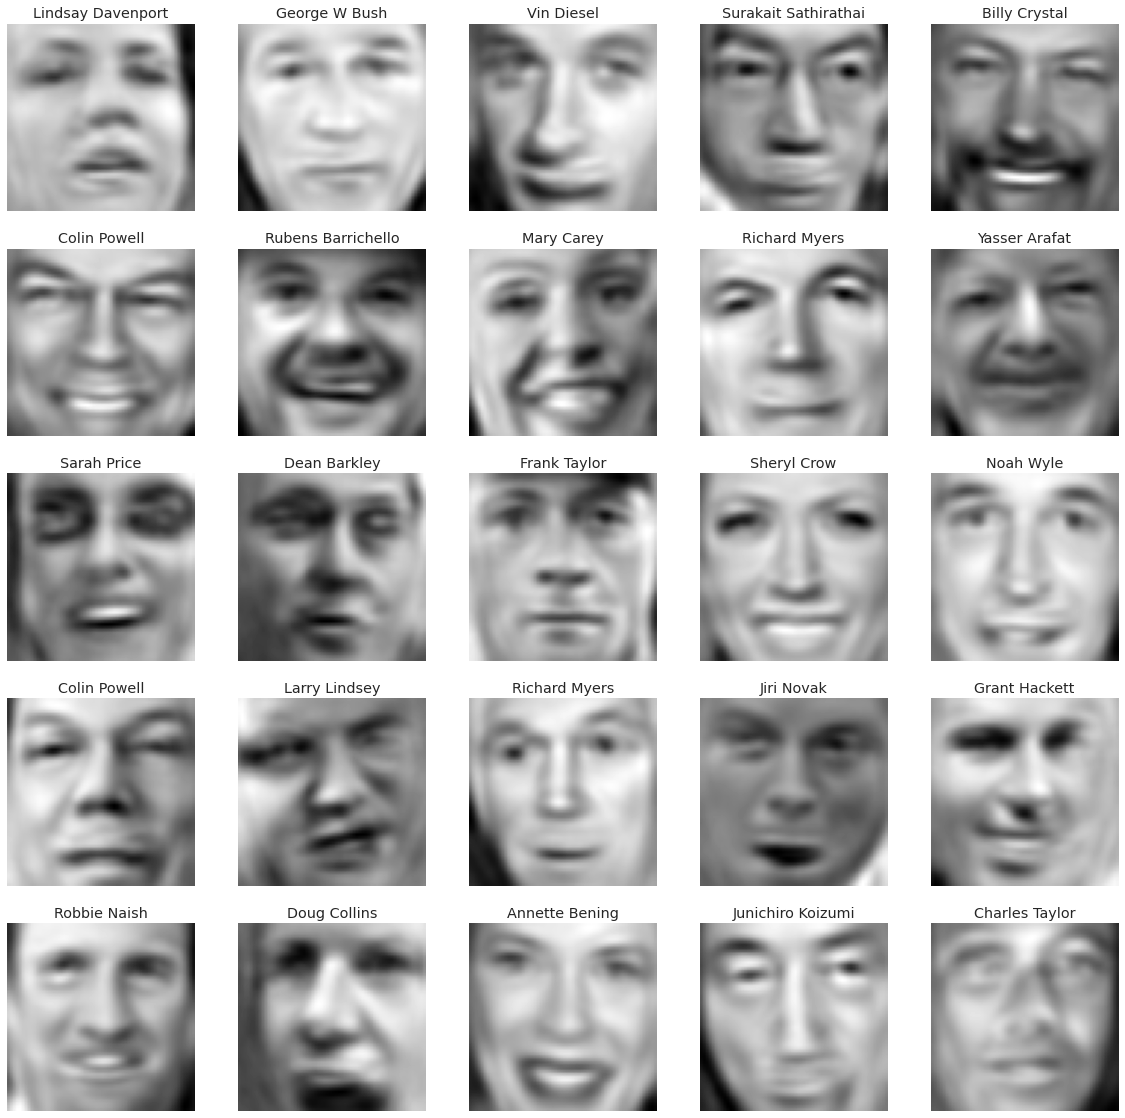

In [45]:
# project top 95% of PCA (PCA = 160)
reconst = pca_obj.pca_then_project_back(160)

# change fonts globally
plt.rcParams['font.size'] = '12'

# rebuild image
i = make_imgs(reconst)

# show random faces
# l = np.random.randint(13231-25)

# show images
face_plot(i[:25], face_names[:25])

**100% variance face grid** (*to compare the previous results*)

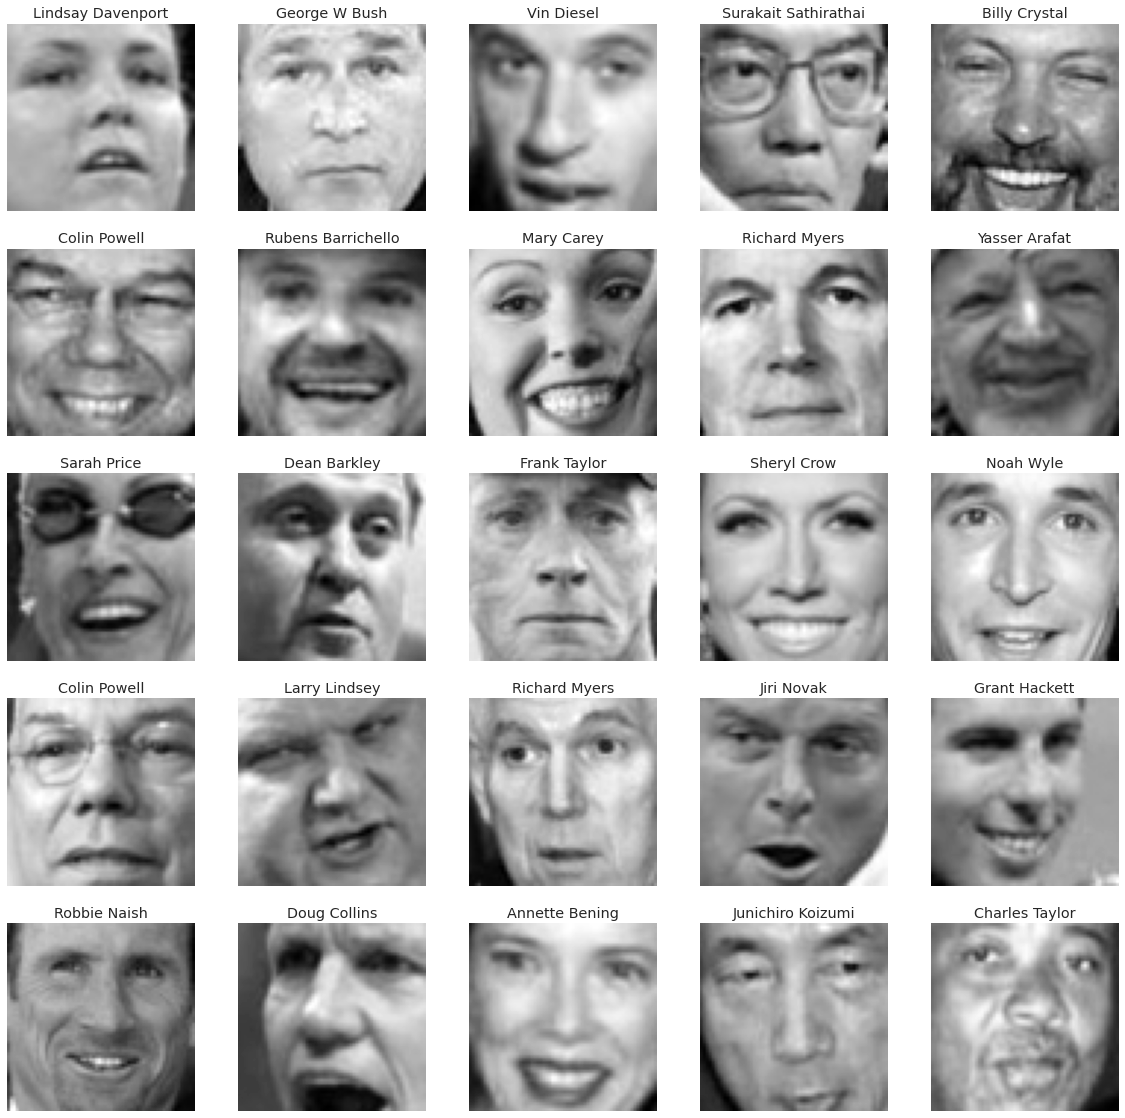

In [53]:
d = make_imgs(face_imgs_vec)
# print(d)
face_plot(d[:25], face_names[:25])

**Question 5:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Question 5 answer:** What we have above is a set of images with a certain amount of variance maintained. The first set of images are the images that contain 50% of the total variance of the original images. Using the elbow plot, I can determine how many PCAs to keep and use that run to run my `pca_then_project_back` method. 

Then, I get my images. The resulting images are very blurry and it is hard to distinguish one image from another. Thus, if I was trying to recreate these images in a faithfully manner, I should increase the amount of variance keep. 

The next set of images are the same images as before, but now store 70% of the total varainace of data of the original images. The image quality as improved since I can make can make out some the facial features of each person's face, but this is still a far from perfect recreation of the images.

The next set of images are the images from before, but now store 80% of the total variance of the data of the original images. Now I am able to make out some smaller details on each face, but it can be difficult to distinguish each image from the others. I should want to increase the total varaince stored by the data set.

The final set of images are the images from before, but now store 95% of the total variance of the data of the original images. Some of these images look very similar to the original images and other are not. What this indicates to me is that perhaps I am getting close to finding a percentage that faithfully reproduced the images. However, it may not be worth it based on the amount of memory gained plus the time it takes to project the data and restruct and print the images.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

In [15]:
# read image
original_image = plt.imread("data/Diego_Rivera/Diego_Rivera_25.jpg")

# reshape
image = np.reshape(original_image, (image.shape[0], image.shape[1] * image.shape[2]))

# convert to data frame
df_image = pd.DataFrame(image)

# print(df_image)

# create pca_cov object
pca_paint = pca_cov.PCA_COV(df_image)

# run pca
pca_paint.pca(np.arange(0, 1701))

finish


/home/arch-user/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


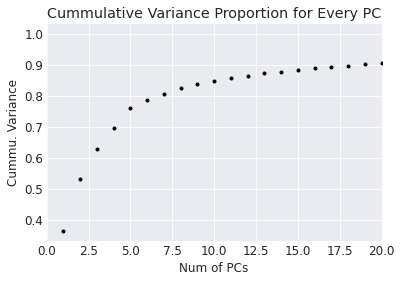

In [20]:
# change fonts globally
plt.rcParams['font.size'] = '12'

# show elbow plot
pca_paint.elbow_plot()

# set lower and upper bounds for the x-axis
x_lower = 0
x_upper = 20
plt.xlim(x_lower, x_upper)

plt.show()

In [21]:
# try top_k = 1
new_image = pca_paint.pca_then_project_back(1)

# reshape image
new_image = np.reshape(new_image, (image.shape[0], image.shape[1], image.shape[2]))

# display image
plt.imshow(new_image)

IndexError: tuple index out of range

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, etc) to inform your analysis and exploration. 

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

### 3. Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.